This notebooks contains a number of viusal inspection tests for the toy data example from figure 2 of the AJIVE paper. The heatmaps of the estimates and residuals may be informative.

In [1]:
from jive.jive import *
from jive.ajive_fig2 import *
from jive.lin_alg_fun import *

# jupyter notebook settings
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Sample toy data

In [ ]:
# sample platonic data
seed = 23423
X_obs, X_joint, X_indiv, X_noise, Y_obs, Y_joint, Y_indiv, Y_noise = generate_data_ajive_fig2(seed)

# compute JIVE decomposition


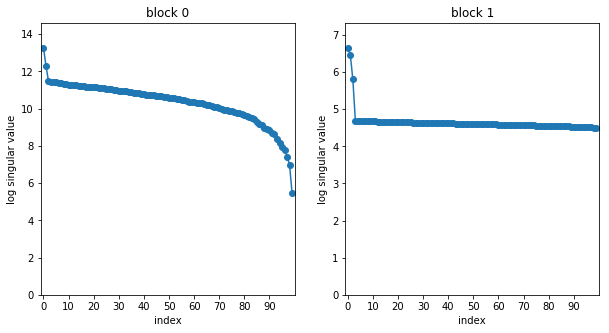

In [2]:
jive = Jive([X_obs, Y_obs])
jive.set_signal_ranks([2, 3])
jive_estimates = jive.get_jive_estimates()

In [3]:
# esimated joint, individual and noise blocks
J_x = jive_estimates[0]["J"]
I_x = jive_estimates[0]["I"]
E_x = jive_estimates[0]["E"]

J_y = jive_estimates[1]["J"]
I_y = jive_estimates[1]["I"]
E_y = jive_estimates[1]["E"]

##  sampled data

plot of the sampled data including the true joint and individual signals

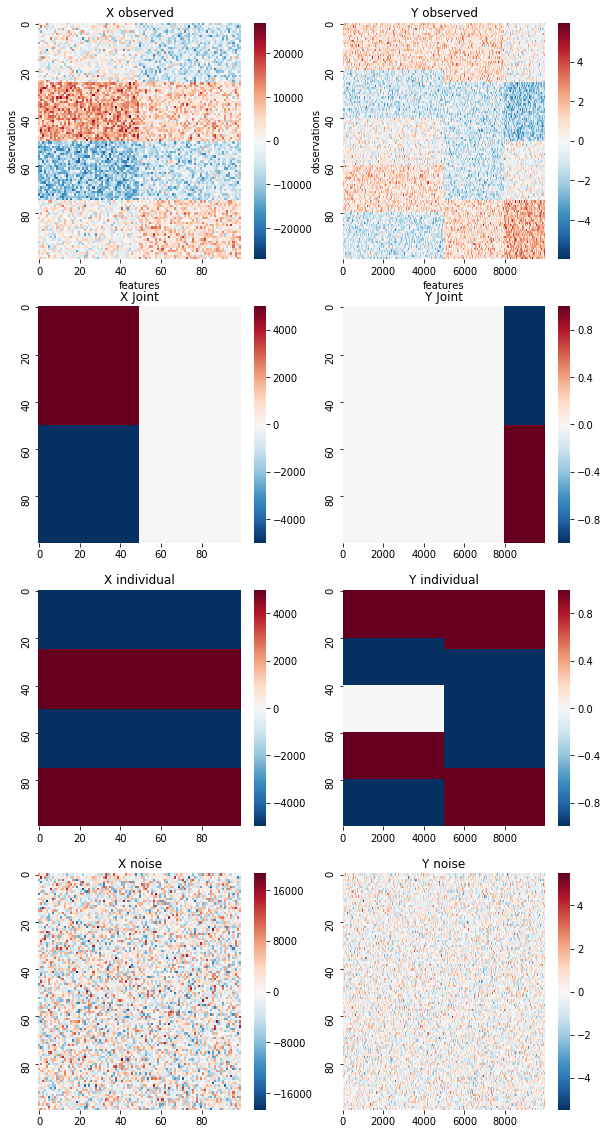

In [4]:
plot_ajive_fig2(X_obs, X_joint, X_indiv, X_noise,
                Y_obs, Y_joint, Y_indiv, Y_noise)

## JIVE estimates

JIVE estimates of the joint, individual and noise blocks.

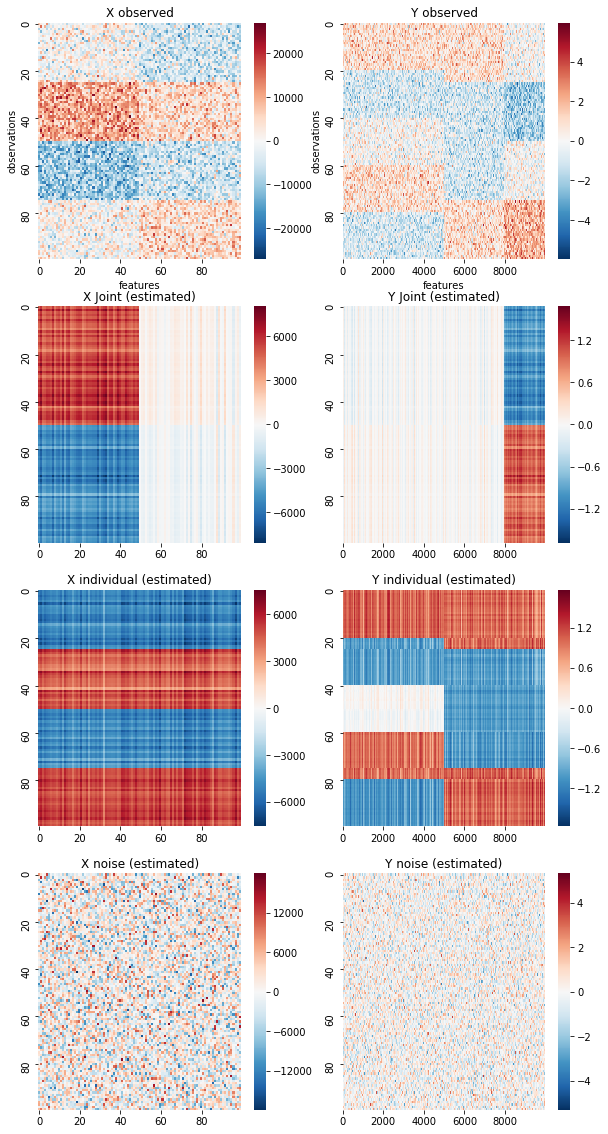

In [5]:
plot_jive_results_2blocks(X_obs, J_x, I_x, E_x,
                          Y_obs, J_y, I_y, E_y)

## Residuals

JIVE residuals for each signal.

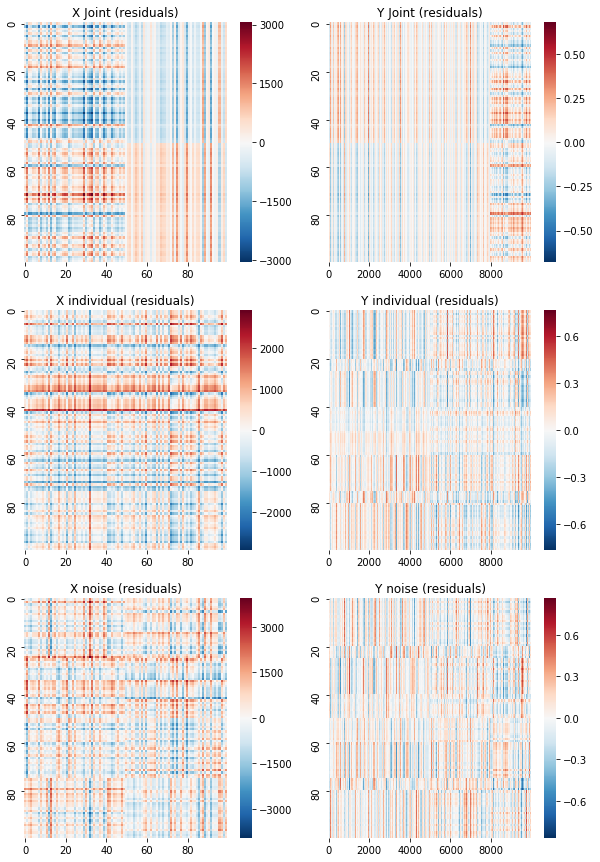

In [6]:
plot_jive_residuals_2block(X_joint, X_indiv, X_noise, J_x, I_x, E_x,
                           Y_joint, Y_indiv, Y_noise, J_y, I_y, E_y)

# Estimation errors

Make sure the relative esimation error is small and that JIVE gets the correct ranks.


Relative error (= (true - estimate)/true) for each signal.

In [7]:
joint_rank = jive_estimates['joint_rank']
print 'correct joint rank: ' + str(joint_rank == 1)
print
print

print 'X block'
J_x = jive_estimates[0]["J"]
I_x = jive_estimates[0]["I"]
E_x = jive_estimates[0]["E"]
indiv_rank = jive_estimates[0]["individual_rank"]

joint_rel_err = relative_error(X_joint, J_x)
indiv_rel_err = relative_error(X_indiv, I_x)
noise_rel_err = relative_error(X_noise, E_x)

print 'relative error'
print 'joint: %f' % joint_rel_err
print 'individual: %f' % indiv_rel_err
print 'noise: %f' % noise_rel_err
print
print 'correct individual rank: ' + str(indiv_rank == 1)


print
print
print 'Y block'
J_y = jive_estimates[1]["J"]
I_y = jive_estimates[1]["I"]
E_y = jive_estimates[1]["E"]
indiv_rank = jive_estimates[1]["individual_rank"]

joint_rel_err = relative_error(Y_joint, J_y)
indiv_rel_err = relative_error(Y_indiv, I_y)
noise_rel_err = relative_error(Y_noise, E_y)

print 'relative error'
print 'joint: %f' % joint_rel_err
print 'individual: %f' % indiv_rel_err
print 'noise: %f' % noise_rel_err
print
print 'correct individual rank: ' + str(indiv_rank == 2)

correct joint rank: True


X block
relative error
joint: 0.208763
individual: 0.150505
noise: 0.181628

correct individual rank: True


Y block
relative error
joint: 0.260246
individual: 0.158252
noise: 0.178787

correct individual rank: True
